In [2]:
from IPython.display import display, Image

# Aim

This document is for the examiner of this course.

In here i will explain what i have done and how I have done it.

There are 3 documents that will compose the whole process of creating the psychological test.

1. Game_logic
2. Cards
3. Psychopy

## What I have done: 
I have done a computer version of the Wisconsin Card Sorting Task (WCST).

The WCST is a psychological test for cognitive flexibility, its commonly used in clinical practice.

In essence its a simple card game. You have a deck of 64 cards, and on the screen is 4 cards(stimulus cards). You then pull one card from the deck and have to group it with one of 4 stimulus cards. Each card has a color,shape and number.

Underneath is an example of a trial of the game.

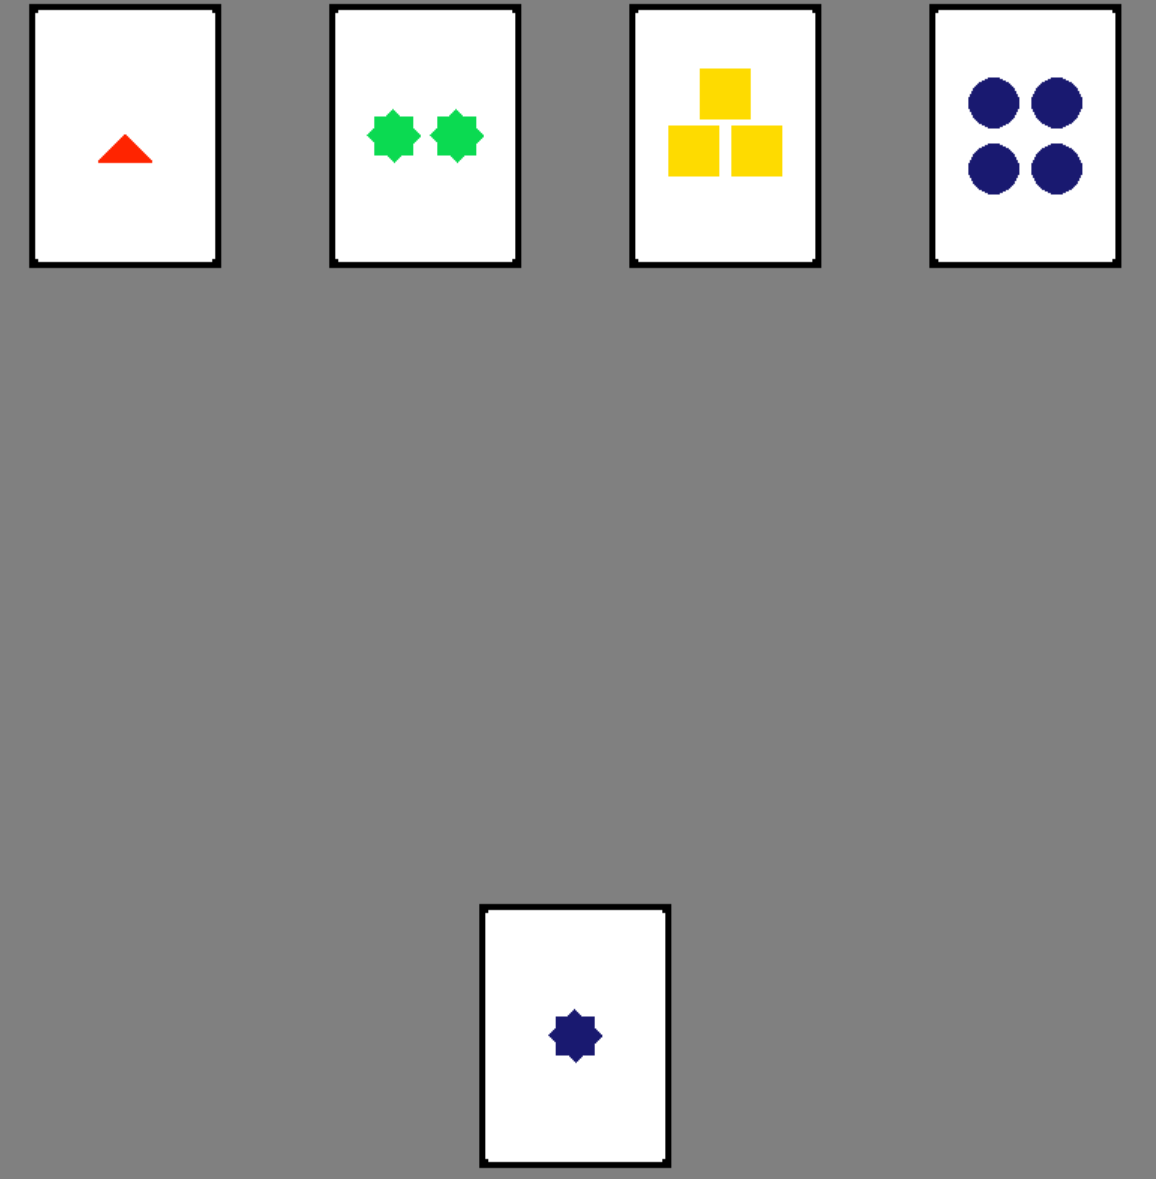

In [3]:
display(Image(filename="../img/example.png", width=500, height=500))

Here the player have to choose where to place the card. There are 3 possible solutions, group by color and place in the 4th pile, shape and 2th, number and 1th. The player will be informed if the choice was correct by feedback.

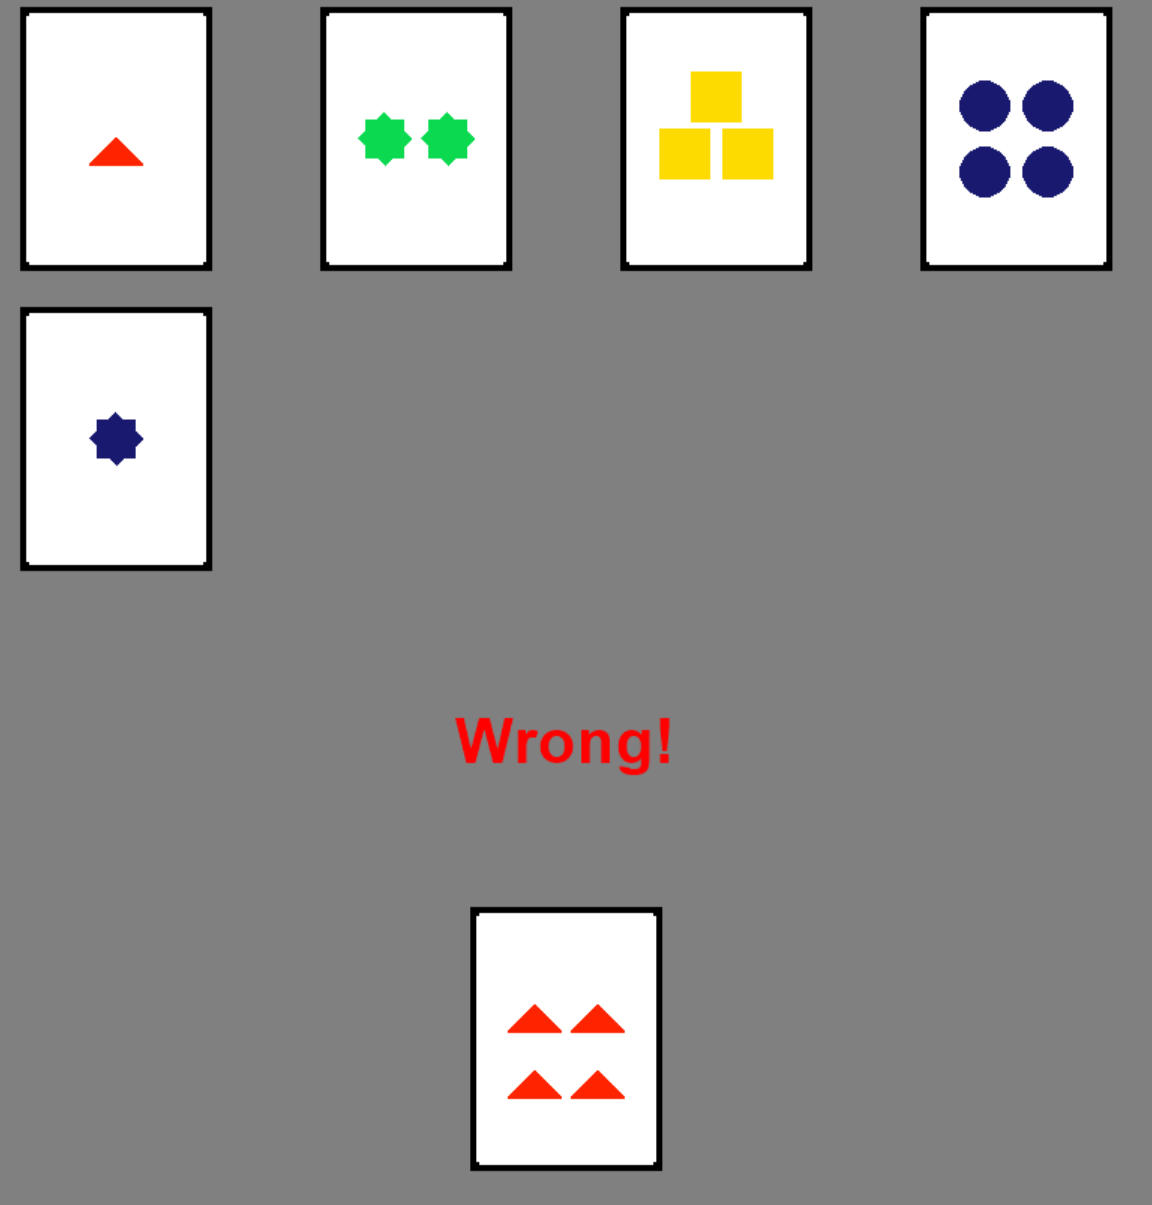

In [4]:
display(Image(filename="../img/exe2.png", width=500, height=500))

The trick is to try untill you figure out the right rule. Then keep sorting by that rule. But after 5 consecutive right answer the rule will change. Then the player has to adjust their method and find the new rule. Thereby this test measures cognitive flexibility.

To make this game we broke the game into separate tasks. First was the task of creating the game logic.
A version of the game that run with text only but had the mechanics needed for implementing images.

We chose a object oriented programming (OOP), as an appropriate approach when making the game. Because we thought it would be beneficial for learning purpouses. Additionally, concepts like cards and stacks can be intuitively captured by classes.

# How I did it:

# Overview of components

1. Classes
    1. Card Class
    2. Stack Class
        1. MainStack
        2. DiscardStack
    
2. Functions
    1. user_input
    2. mathced_categories
    3. save_results
3. Game
    1. Imports
    2. Create decks
    3. Initilize
    4. Game_loop


# CLASSES

## A card class. 
Lies at the core of the game. Its an blueprint for creating card objects.It defines the properties and behaviors that the objects created from it (known as instances) will have. 

In [1]:
class Card:

    def __init__(self,number,shape,color):
        self.number = number
        self.shape = shape
        self.color = color

    def get_card_property(self, prop):
        """
        Function returns one of the properties of the card.
        prop is one of "number", "shape" or "color"
        """
        if prop=="number":
            return self.number
        elif prop=="shape":
            return self.shape
        elif prop=="color":
            return self.color
        else:
            raise AttributeError("Unknown atttribute")
    
    def __repr__(self):
        return "Card({num},{shape},{color})".format(num=self.number,shape=self.shape, color=self.color)


Each card will be initialized with a number, shape and a color. 

Each card has the ability (method) of returning its own property. For example: shape_card1 = card1.get_card_property(shape)

Each card also can represent itself in string fromat. This is usefull when we deal with the text based version of the game.

Next another core concept of the game is the stack class.

## The stack class

In [2]:
class Stack():
    def __init__(self,list_of_cards):
        self.list_of_cards = list_of_cards       
    
    def __len__(self):
        return len(self.list_of_cards)
    
    def add(self,new_card):
        self.list_of_cards.append(new_card)
    
    def pop(self):
        return self.list_of_cards.pop()
    

As the name suggests this is stack, something that can be thought of as a deck of cards.

It initializes itself with a list of cards objects.

It has 3 methods. Theese methods represent the basic actions that can be taken by a deck of cards.
1. len, gives the number of cards in the stack. Its like counting the cards
2. add, takes a card and puts it in the stack. Put a card in the deck
3. pop, takes a card and remowes it from the stack. Take a card from the deck


## MainStack

In [3]:
class MainStack(Stack):
    """
    Reprenstation of the main stack, containing the full set in the beginning.
    """
    numbers = [1,2,3,4]
    shapes = ["circle","square","triangle","star"]
    colors = ["blue","green","red","yellow"]
    
    def __init__(self):
        self.list_of_cards = []
        for i in self.numbers:
            for y in self.shapes:
                for x in self.colors:
                    card = Card(i,y,x)
                    self.list_of_cards.append(card)
        random.shuffle(self.list_of_cards)
        
    def render(self):
        print("Main Stack: %s"%self.list_of_cards[-1])


This is a child class of the stack class. As such it inherits all the methods of the stack class but includes some custom functions that are needed for this component. This is the stack that represents the main deck, this is the deck that participants pull cards from and group with the stimulus cards.

This class contains list variables containing information for the card properties.

This class has a custom initialization function. It can in essence construct itself into a stack containing 4 * 4 * 4 = 64 card objects. After which the deck is automatically shuffled.

This class also has a custom method: render() that takes the bottom card of the stack and prints out the card information using the cards _repr_ method.

Here its important to note that we chose the end of the list to represent the top of the deck. That was the best approach to program for the player that fact matters not, as the stacks behave like normal decks just inversed.

## DiscardStack

In [4]:
class DiscardStack(Stack):
    def __init__(self, num):
        self.list_of_cards=[]
        self.stimulus_card=None
        
        if num==1:
            self.stimulus_card=Card(1, "triangle", "red")
        elif num==2:
            self.stimulus_card=Card(2, "star", "green")
        elif num==3:
            self.stimulus_card=Card(3, "square", "yellow")
        elif num==4:
            self.stimulus_card=Card(4, "circle", "blue")

    
        
    def render(self):
        if len(self.list_of_cards)>0:
            card=self.list_of_cards[-1]
        else:
            card="<empty>"
        print("Stimulus: %s, Last card: %s"%(self.stimulus_card, card))

This is another child class of the stack class.

It contains a custom initlization function. This function takes in a number and based on the number it will create a specified card object in a field named the stimulus_card. This is done because the stimulus cards are always the same and presented in a predefined order.

This contains a custom render method. It will in essence print out the top card in the discard stack (if there are any) and the stimulus card.

# Functions

## user_input

In [5]:
def user_input():
    while True:
        try:
            c = int(input("Type 1, 2, 3, or 4 to choose where to group your card: "))
            if c in [1, 2, 3, 4]:
                return c
            else:
                print("Please enter a valid choice (1, 2, 3, or 4).")
        except ValueError:
            print("Please enter a valid choice (1, 2, 3, or 4).")

This function is simple. It asks the player to group the active card with one of the stimulus cards.
The choice is registered by typing in 1,2,3 or 4. Only theese answers will alow the loop to end.

## matched_category

In [6]:
def matched_category(rules,choice, a_card,stim_card):
    """" parameters: 
        a function that takes in, a list of matching categories 'aka' rules, and two card objects
        returns: a list of strings that contain the categories on which the cards are matched """
    matched = []
    for rule in rules:
        if a_card.get_card_property(rule) == stim_card.get_card_property(rule):
            matched.append(rule)
    return matched

This is a function that checks on what properties the cards were matched on.

It takes in a list of rules, a choice, and two card objects. The stim_card represents the chosen card and a_card represents card from hand. 

Then it uses the get_card_property() method in a loop. Checking for all possible properties, for both cards and if there is a match it will store this in a list.

In essence this will store all the attributes that the cards were matched on in a single round or trial of the game.

This is being used later in the script for saving the results.

## Save_results

In [7]:
def save_results(data, filename):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        for row in data:
            writer.writerow(row)

This is a besic save function. It takes in a datafile (list) and a filename (string).

Then it saves it as comma-separetad-values(csv) file.

# Game

## Imports

In [8]:
import random
import csv
import os

Here are some basic libraries that are used in the code.

## Create decks

To begin we first make use of the classes and create 5 decks of cards. (mainstack and dstacks 1 - 4)

In [9]:
mainstack = MainStack()
dstacks = {i:DiscardStack(i) for i in range(1,5)}

This is all we need to type in the code to achieve this.

Because the work is done inside the classes. For example:

The code below is located inside the mainstack class.  It will create a stack of 64 cards, containing all posible combinations of the 3 atributes that contain 4 possible values each. 4 x 4 x 4 = 64.

In [10]:
    ### CODE INSIDE MAINSTACK CLASS ##############
    numbers = [1,2,3,4]
    shapes = ["circle","square","triangle","star"]
    colors = ["blue","green","red","yellow"]
    
    def __init__(self):
        self.list_of_cards = []
        for i in self.numbers:
            for y in self.shapes:
                for x in self.colors:
                    card = Card(i,y,x)
                    self.list_of_cards.append(card)
        random.shuffle(self.list_of_cards)
    ###############################################

So when we call: 
    mainstack = MainStack()
    
It will create the main deck.

The dstacks are created in a similar way. But each stack is stored in a dictionary with a specific key. Additionally, they need to take in a number from 1 - 4 specifying the stimulus card.


Now when the decks are created, we will initilize some global variables.

## Initialization

In [11]:
# initialize
rules = ["shape", "color", "number"]
active_rule = random.choice(rules)

win_streak=0
filename = "../results/data.csv"
logger = []

To run the game loop we need some global values.

We create a list of rules. These include all the possible attributes that the cards can be sorted by.
Then we randomly choosen and active rule.

We initilize the win_streak as 0.
We specify the filename and path where we want the game data to be stored.

We create an empty list that will be filled with the game data.

## Game loop

Below is the core game loop. The explanation is done in the code.

In [ ]:
while len(mainstack)>0: # This will make the loop repeat itself as long as there are cards in the mainstack, so 64 times.
    
    mainstack.render()  # Here the code uses the mainstacks render method. Thereby displaying the top card.
    for stack in dstacks.values(): # A loop that iterates over all the discardstacks
        stack.render()             # and uses the custom reder function of the stack.Thereby displaying the stimcard, discard pile.
        

    card = mainstack.pop() # The top card is removed from the mainstack
    choice = user_input()  # The user input function is called and the choice is stored
    
    chosen_card=dstacks[choice].stimulus_card # The chosen stimulus card is navigated to and stored
    dstacks[choice].add(card)                 # The hand card is placed in the chosen discard pile
    
    # Correctness of the choice is assessed
    correct = card.get_card_property(active_rule)==chosen_card.get_card_property(active_rule)
    print(correct)  

Main Stack: Card(4,triangle,blue)
Stimulus: Card(1,triangle,red), Last card: <empty>
Stimulus: Card(2,star,green), Last card: <empty>
Stimulus: Card(3,square,yellow), Last card: <empty>
Stimulus: Card(4,circle,blue), Last card: <empty>
Type 1, 2, 3, or 4 to choose where to group your card: 1
False
Main Stack: Card(3,circle,red)
Stimulus: Card(1,triangle,red), Last card: Card(4,triangle,blue)
Stimulus: Card(2,star,green), Last card: <empty>
Stimulus: Card(3,square,yellow), Last card: <empty>
Stimulus: Card(4,circle,blue), Last card: <empty>
Type 1, 2, 3, or 4 to choose where to group your card: 2
False
Main Stack: Card(4,star,green)
Stimulus: Card(1,triangle,red), Last card: Card(4,triangle,blue)
Stimulus: Card(2,star,green), Last card: Card(3,circle,red)
Stimulus: Card(3,square,yellow), Last card: <empty>
Stimulus: Card(4,circle,blue), Last card: <empty>
Type 1, 2, 3, or 4 to choose where to group your card: 3
False
Main Stack: Card(4,star,red)
Stimulus: Card(1,triangle,red), Last card

Here is the continuation of the game loop

It does 3 simple things after the core of the loop has been passed.

1. The game will update the global winstreak variable.
2. The results of the trial are passed into the logg variable
3. The active rule is changed if the win streak is over 5.


In [ ]:
    
    # Update winstreak
    if correct:
        win_streak += 1    
    else:
        win_streak = 0
        
    # Logg results
    match = matched_category(rules, choice, card)
    trial = [active_rule, match]
    logger.append(trial)    
    
    # Change rule if streak is more than 5   
    if win_streak >= 5:
        active_rule=random.choice(list(set(rules).difference([active_rule])))
        win_streak = 0     

In the end this is how the complete loop looks like.

In [ ]:
# Game Loop
while len(mainstack)>0:
    # render current stacks
    mainstack.render()
    for stack in dstacks.values():
        stack.render()
        
    # take card from main stack
    card = mainstack.pop()
    # let user choose one of the cards
    choice = user_input()
    chosen_card=dstacks[choice].stimulus_card
    dstacks[choice].add(card)
    
    # assess correctness
    correct = card.get_card_property(active_rule)==chosen_card.get_card_property(active_rule)
    
    print(correct)
    
    # Update winstreak
    if correct:
        win_streak += 1    
    else:
        win_streak = 0
        
    # Logg results
    match = matched_category(rules, choice, card)
    trial = [active_rule, match]
    logger.append(trial)    
    
    # Change rule if streak is more than 5   
    if win_streak >= 5:
        active_rule=random.choice(list(set(rules).difference([active_rule])))
        win_streak = 0
        
#save_results(logger,filename)

This is all there is to it, in this basic version of the game.

One thing to note is that when the loop is finished. The results are saved in the predefined folder. Its commented out now so that testing wont create any new files on your computer.